<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


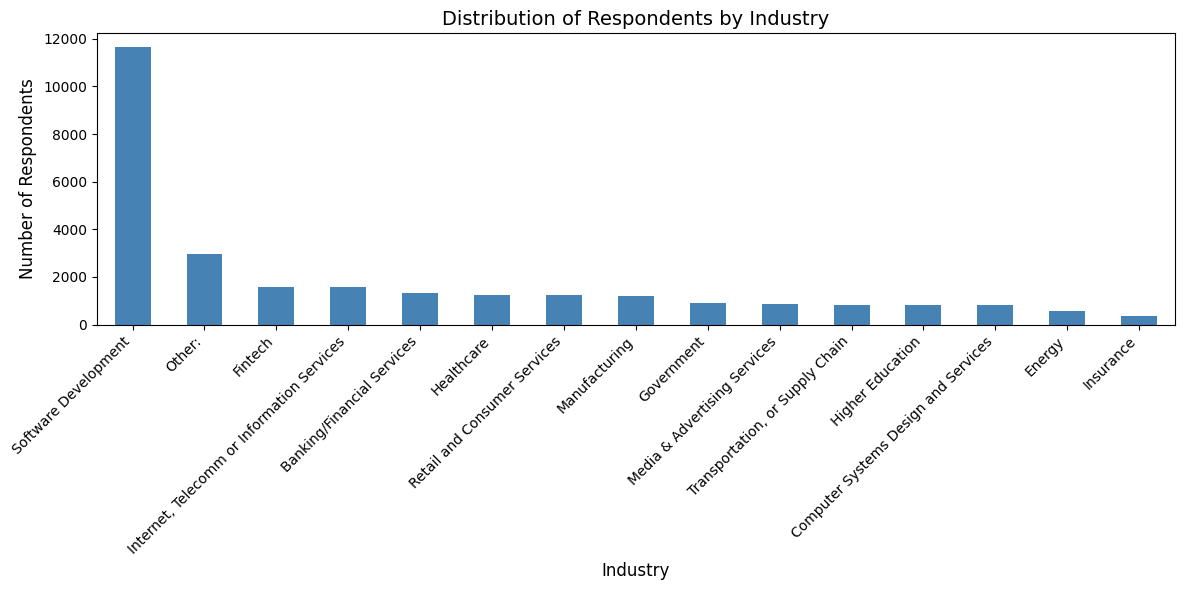

In [5]:
##Write your code here
df_clean = df.copy()
df_clean.dropna(subset=['Employment', 'JobSat', 'YearsCodePro'], inplace=True)
industry_counts = df_clean['Industry'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Respondents by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [7]:
##Write your code here
mean_compensation = df_clean['ConvertedCompYearly'].mean()
median_compensation = df_clean['ConvertedCompYearly'].median()
std_compensation = df_clean['ConvertedCompYearly'].std()
print(f"Mean Compensation: {mean_compensation}")
print(f"Median Compensation: {median_compensation}")
print(f"Standard Deviation of Compensation: {std_compensation}")
threshold = mean_compensation + (3 * std_compensation)
high_compensation_outliers = df_clean[df_clean['ConvertedCompYearly'] > threshold]
print(f"Number of high compensation outliers: {high_compensation_outliers.shape[0]}")
print(high_compensation_outliers[['ConvertedCompYearly', 'Employment', 'EdLevel']].head())

Mean Compensation: 86021.40145894383
Median Compensation: 66000.0
Standard Deviation of Compensation: 172384.86661141147
Number of high compensation outliers: 63
      ConvertedCompYearly           Employment  \
529              650000.0  Employed, full-time   
828             1000000.0  Employed, full-time   
1932             945000.0  Employed, full-time   
2171             750000.0  Employed, full-time   
2177             639000.0  Employed, full-time   

                                              EdLevel  
529      Bachelor’s degree (B.A., B.S., B.Eng., etc.)  
828   Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  
1932     Bachelor’s degree (B.A., B.S., B.Eng., etc.)  
2171     Bachelor’s degree (B.A., B.S., B.Eng., etc.)  
2177  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Lower bound for outliers: -78387.5
Upper bound for outliers: 220280.5
Number of outliers: 637
     ConvertedCompYearly           Employment  \
428             230000.0  Employed, full-time   
456             300000.0  Employed, full-time   
461             254425.0  Employed, full-time   
529             650000.0  Employed, full-time   
545             400000.0  Employed, full-time   

                                               EdLevel  
428       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  
456     Professional degree (JD, MD, Ph.D, Ed.D, etc.)  
461    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  
529       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  
545  Secondary school (e.g. American high school, G...  


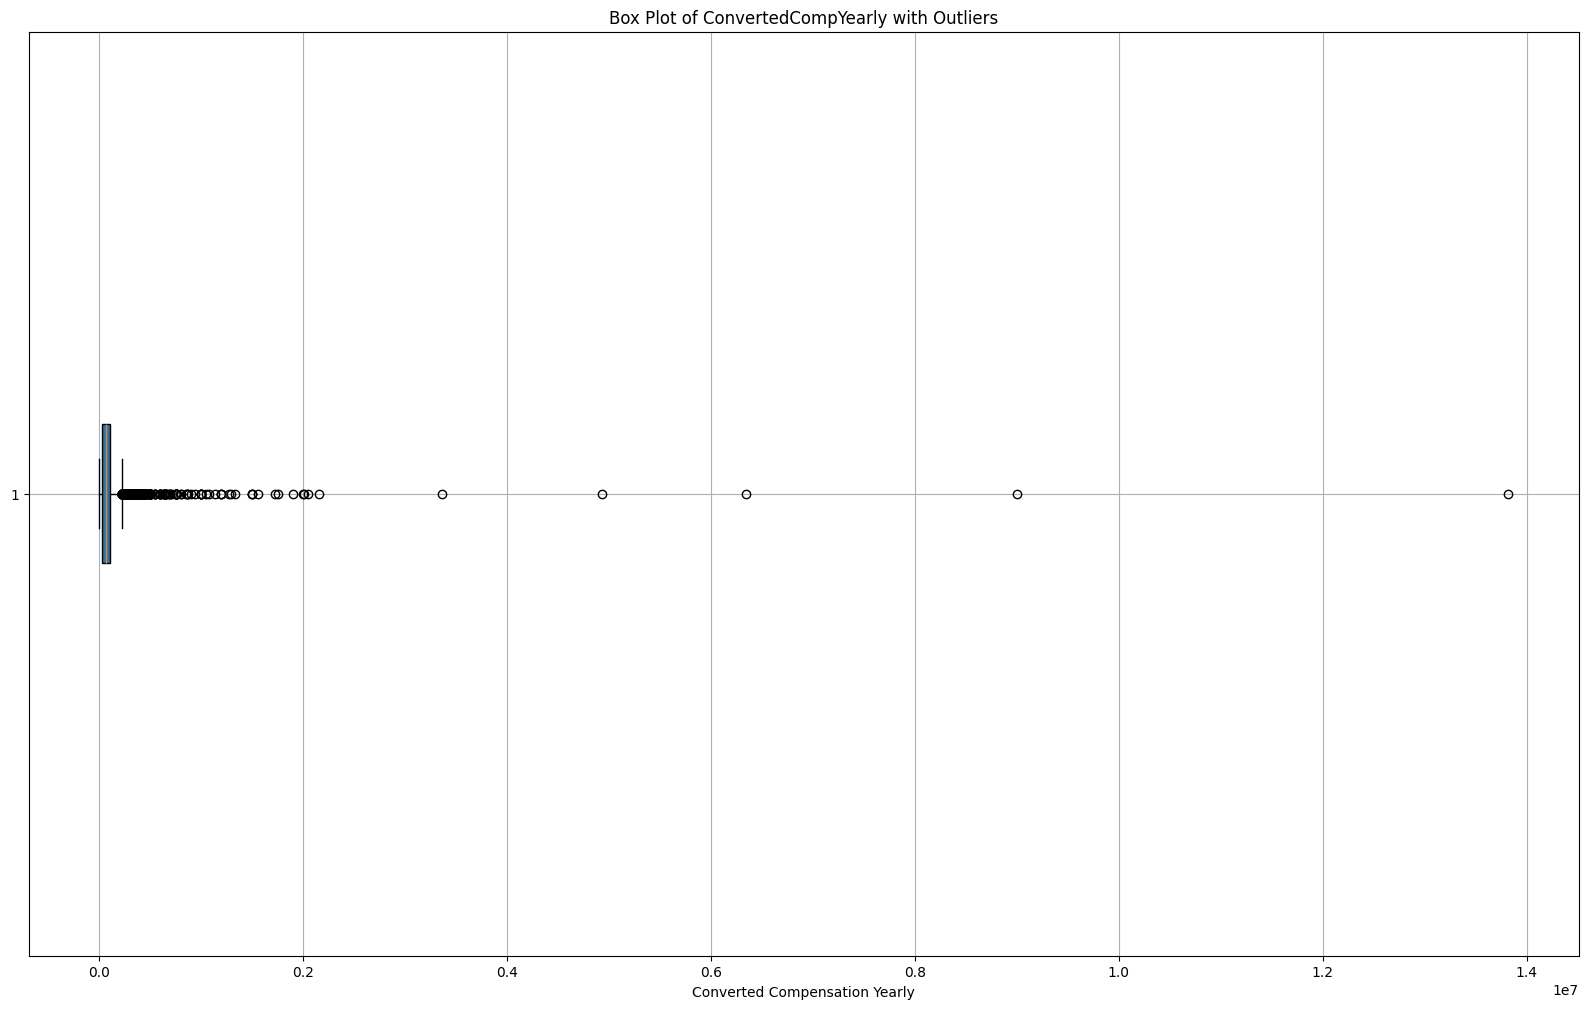

In [10]:
##Write your code here
# IQR
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
# bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
# outliers
outliers = df_clean[(df_clean['ConvertedCompYearly'] < lower_bound) | (df_clean['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['ConvertedCompYearly', 'Employment', 'EdLevel']].head())
# box plot
plt.figure(figsize=(20, 12))
plt.boxplot(df_clean['ConvertedCompYearly'].dropna(), vert=False, patch_artist=True)
plt.title("Box Plot of ConvertedCompYearly with Outliers")
plt.xlabel("Converted Compensation Yearly")
plt.grid(True)
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [12]:
##Write your code here
# IQR for 'ConvertedCompYearly'
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
# define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# new df excluding the outliers
df_no_outliers = df_clean[(df_clean['ConvertedCompYearly'] >= lower_bound) & (df_clean['ConvertedCompYearly'] <= upper_bound)]
# validate size of new df
print(f"Original DataFrame size: {df_clean.shape}")
print(f"New DataFrame size (after removing outliers): {df_no_outliers.shape}")

Original DataFrame size: (28356, 114)
New DataFrame size (after removing outliers): (15402, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here
# map age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}
# replace age with numeric map
df_clean['AgeNumeric'] = df_clean['Age'].map(age_mapping)
# calculate correlation between age and other numeric columns
numeric_columns = df_clean.select_dtypes(include=['number']).columns
# calculate correlation matrix
correlation_matrix = df_clean[numeric_columns].corr()
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# Optionally, print the correlation between AgeNumeric and other numerical columns
print("Correlation between Age and other numerical variables:")
print(correlation_matrix['AgeNumeric'].sort_values(ascending=False))

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
